In [13]:
import PyCC
import numpy as np
import matplotlib.pyplot as plt

sim = PyCC.Sim(PyCC.Halo.PLUMMER,1000)

nsteps = 100
dt = 1e-5

sim.evaluate(precision="f4",accelerate=True,steps=nsteps,dt=dt)
sim.evaluate(precision="f4",accelerate=False,steps=nsteps,dt=dt)
sim.evaluate(precision="f8",accelerate=False,steps=nsteps,dt=dt)
sim.evaluate(precision="f2",accelerate=True,steps=nsteps,dt=dt)

pass

In [14]:
f4gpu = sim.energies(precision="f4",accelerate=True,dt=dt)
f4nogpu = sim.energies(precision="f4",accelerate=False,dt=dt)
f8nogpu = sim.energies(precision="f8",accelerate=False,dt=dt)
f2gpu = sim.energies(precision="f2",accelerate=True,dt=dt)

In [19]:
def plot_prettier(dpi=150, fontsize=10, usetex=False): 
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in') 
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    
plot_prettier()

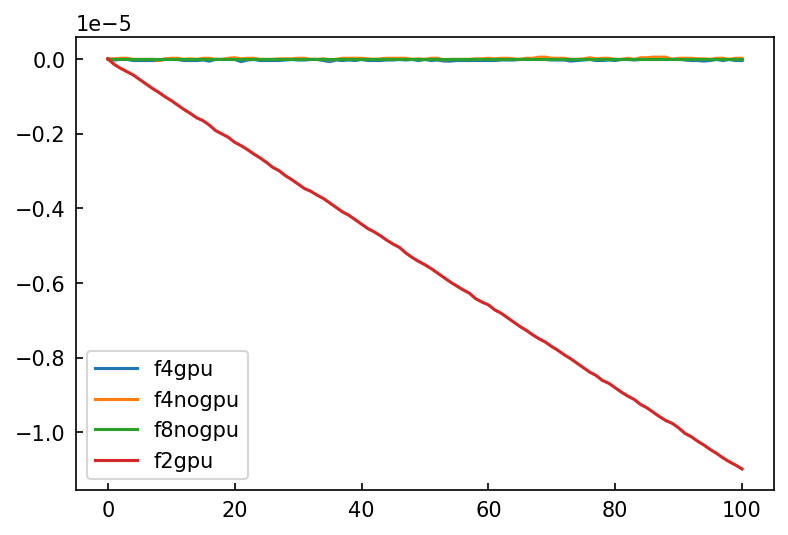

In [33]:
plt.plot(f4gpu["total"] - f4gpu["total"][0],label="f4gpu")
plt.plot(f4nogpu["total"] - f4nogpu["total"][0],label="f4nogpu")
plt.plot(f8nogpu["total"] - f8nogpu["total"][0],label="f8nogpu")
plt.plot(f2gpu["total"] - f2gpu["total"][0],label="f2gpu")
plt.ticklabel_format(useOffset=False)
plt.legend()
plt.show()